In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk import WordNetLemmatizer
import numpy as np

## Urdu hack

In [1]:
pip install urduhack

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   -------------------------------------- 105.5/105.5 kB 762.4 kB/s eta 0:00:00
   ---------------------------------------- 82.8/82.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 3.4/3.4 MB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 742.5/742.5 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 115.3/115.3 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 491.3/491.3 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 52.3/52.3 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 229.1/229.1 kB 3.5 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21545 sha256=6151d52858e5f144a678612a20e41da8d1cca412c89fa148e97772cf9dd6aaa8
  Stored in directory: c:\users\hamz

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fiona 1.9.6 requires click~=8.0, but you have click 7.1.2 which is incompatible.


In [3]:
import urduhack
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace,remove_punctuation,remove_accents,replace_urls,replace_emails,replace_numbers,replace_currency_symbols

from urduhack.models.lemmatizer import lemmatizer

In [83]:
urduhack.download()

89078/89078 [==============================] - 0s 2us/step


## Reading files

In [4]:
urdu_dataset = pd.read_csv("urdu-sentiment-corpus-v1.tsv",sep="\t")
urdu_dataset.head()

,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N
2,ٹویٹر کا خیال کیسے آیا ؟,O
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P


In [5]:
urdu_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1000 non-null   object
 1   Class   999 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


## Removing null values

In [6]:
print(urdu_dataset.isna().sum())
null_check = urdu_dataset.isna().sum().sum()>0
if null_check:
    urdu_dataset.dropna(inplace=True)
    print("After Null values Removed\n",urdu_dataset.isna().sum())

Tweet    0
Class    1
dtype: int64
After Null values Removed
 Tweet    0
Class    0
dtype: int64


In [7]:
urdu_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   999 non-null    object
 1   Class   999 non-null    object
dtypes: object(2)
memory usage: 23.4+ KB


## Values counts

In [8]:
urdu_dataset.Class.value_counts()

N    499
P    480
O     20
Name: Class, dtype: int64

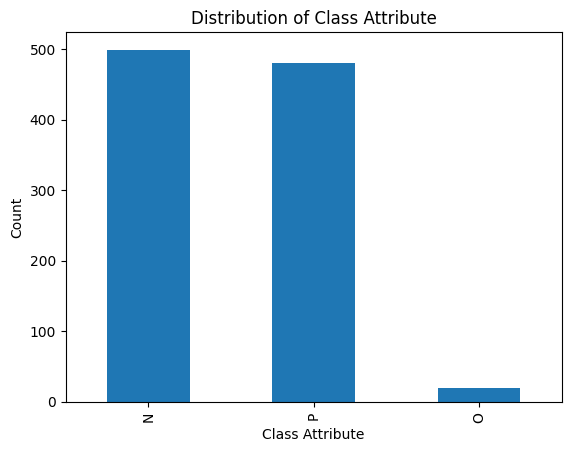

In [9]:
urdu_dataset['Class'].value_counts().plot(kind='bar')

plt.xlabel('Class Attribute')
plt.ylabel('Count')
plt.title('Distribution of Class Attribute')

plt.show()

## Label Encoding Class Attribute

In [10]:
label_encoder = LabelEncoder()
urdu_dataset['Encoded_Class'] = label_encoder.fit_transform(urdu_dataset['Class'])

print(urdu_dataset['Encoded_Class'].unique())
#0 -> Negative
#2 -> Positive
#1 -> Neutral

[2 0 1]


In [11]:
urdu_dataset.Encoded_Class.value_counts()

0    499
2    480
1     20
Name: Encoded_Class, dtype: int64

## Preprocessing
#0 -> Negative
#2 -> Positive
#1 -> Neutral

In [12]:
urdu_dataset.head()

,Tweet,Class,Encoded_Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P,2
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N,0
2,ٹویٹر کا خیال کیسے آیا ؟,O,1
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P,2
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P,2


In [13]:

file_path = 'my_urdu_stopwords.txt'
STOP_WORDS= ""
with open(file_path,'r',encoding='utf-8')as file:
    urdu_stop_words = file.read().strip()
    STOP_WORDS+=urdu_stop_words
stopword = STOP_WORDS.split()
print(stopword)

['اب', 'ابھی', 'اپنا', 'اپنے', 'اپنی', 'اٹھا', 'اس', 'اسے', 'اسی', 'اگر', 'ان', 'انہوں', 'انہی', 'انہیں', 'انھیں', 'او', 'اور', 'اے', 'ایسا', 'ایسے', 'ایسی', 'ایک', 'آ', 'آپ', 'آتا', 'آتے', 'آتی', 'آگے', 'آنا', 'آنے', 'آنی', 'آئے', 'آئی', 'آئیں', 'آیا', 'با', 'بڑا', 'بڑے', 'بڑی', 'بعد', 'بعض', 'بلکہ', 'بہت', 'بھی', 'بے', 'پاس', 'پر', 'پہلے', 'پھر', 'تا', 'تاکہ', 'تب', 'تجھ', 'تجھے', 'تک', 'تم', 'تمام', 'تمہارا', 'تمہارے', 'تمھارے', 'تمہاری', 'تمہیں', 'تمھیں', 'تھا', 'تھے', 'تھی', 'تھیں', 'تو', 'تیری', 'تیرے', 'جا', 'جاتا', 'جاتی', 'جاتے', 'جاتی', 'جانے', 'جانی', 'جاؤ', 'جائے', 'جائیں', 'جب', 'جس', 'جن', 'جنہوں', 'جنہیں', 'جو', 'جیسا', 'جیسے', 'جیسی', 'جیسوں', 'چاہیئے', 'چلا', 'چاہے', 'چونکہ', 'حالاں', 'حالانکہ', 'دو', 'دونوں', 'دوں', 'دے', 'دی', 'دیا', 'دیں', 'دیے', 'دیتا', 'دیتے', 'دیتی', 'دینا', 'دینے', 'دینی', 'دیئے', 'ڈالا', 'ڈالنا', 'ڈالنے', 'ڈالنی', 'ڈالے', 'ڈالی', 'ذرا', 'رکھا', 'رکھتا', 'رکھتے', 'رکھتی', 'رکھنا', 'رکھنے', 'رکھنی', 'رکھے', 'رکھی', 'رہ', 'رہا', 'رہتا', 'رہتے', 'ر

In [14]:
import string
print(len(stopword))

265


In [15]:
def lemmatize_text(text):
    lemmetized = ""
    temp  = lemmatizer.lemma_lookup(text)
    for t in temp:
        lemmetized+=t[0]+" "
    return lemmetized.strip()
    
def remove_my_stopwords(text, stopwords):
    return " ".join(word for word in text.split() if word not in stopwords)


In [16]:
processed_df = pd.DataFrame(columns=['old_text','text'])
processed_df['old_text'] = urdu_dataset['Tweet']
processed_df['text'] = urdu_dataset.Tweet
processed_df['text'] = processed_df.text.apply(normalize)
processed_df['text'] = processed_df.text.apply(remove_accents)
processed_df['text'] = processed_df.text.apply(remove_punctuation)
processed_df['text'] = processed_df.text.apply(replace_emails)
processed_df['text'] = processed_df.text.apply(replace_numbers)
processed_df['text'] = processed_df.text.apply(replace_currency_symbols)

processed_df['cleaned_text'] = processed_df['text'].apply(lambda x: remove_my_stopwords(x, stopword))

processed_df['Found_stop_words'] = processed_df['text'].apply(lambda x: any(word in stopword for word in x.split()))

processed_df['lemmetized_text'] = processed_df.text.apply(lemmatize_text)
processed_df['Class'] = urdu_dataset.Encoded_Class

In [17]:
processed_df.head()

,old_text,text,cleaned_text,Found_stop_words,lemmetized_text,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,میں نے ایٹم بم بنایا ھے او بھائی ایٹم بمب کوٹ ...,ایٹم بم بنایا ھے بھائی ایٹم بمب کوٹ لکھپت اتفا...,True,میں نے ایٹم بم بنایا ھے او بھائی ایٹم بمب کوٹ ...,2
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,چندے انقلاب عمران خان وزیر اعظم بن سکتے,True,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,0
2,ٹویٹر کا خیال کیسے آیا ؟,ٹویٹر کا خیال کیسے آیا,ٹویٹر خیال,True,ٹویٹر کا خیال کیسے آیا,1
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی ب...,سرچ انجن گوگل نائب صدر فضا فٹ بلندی چھلانگ عال...,True,سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...,2
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار أ,اسکی لہریں یار أ,True,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار أ,2


In [18]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   old_text          999 non-null    object
 1   text              999 non-null    object
 2   cleaned_text      999 non-null    object
 3   Found_stop_words  999 non-null    bool  
 4   lemmetized_text   999 non-null    object
 5   Class             999 non-null    int32 
dtypes: bool(1), int32(1), object(4)
memory usage: 43.9+ KB


In [21]:
# analysis_df = pd.DataFrame(columns=['word','Class'])
# analysis_df.word = processed_df.text_separated.apply(str)
# analysis_df.Class = processed_df.Class
# analysis_df.head()
df = pd.DataFrame(columns=['Tweet','Class'])
df['Tweet'] = processed_df['cleaned_text']
df['Class'] = processed_df.Class
df.head()

,Tweet,Class
0,ایٹم بم بنایا ھے بھائی ایٹم بمب کوٹ لکھپت اتفا...,2
1,چندے انقلاب عمران خان وزیر اعظم بن سکتے,0
2,ٹویٹر خیال,1
3,سرچ انجن گوگل نائب صدر فضا فٹ بلندی چھلانگ عال...,2
4,اسکی لہریں یار أ,2


## Analysis df to csv

In [116]:
urdu_dataset.to_csv('Analysed_Urdu_Tweets.csv')

## WORDS in dataset

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Tweet'])
sequences = tokenizer.texts_to_sequences(df['Tweet'])
max_sequence_length = max(len(x) for x in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')


## Split the dataset

In [119]:
# from sklearn.model_selection import train_test_split
# X=urdu_dataset.Tweet
# y = urdu_dataset.Encoded_Class
# # train_df,test_df = train_test_split(urdu_dataset, test_size=0.25)

# # print("Training set shape:", train_df.shape)
# # print("Testing set shape:", test_df.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# print("Training set shape:",X_train.shape)
# print("Testing set shape:", X_test.shape)


Training set shape: (599,)
Testing set shape: (400,)


In [28]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Class'], test_size=0.25, random_state=42)


## MODELS

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.optimizers import Adam

## EVAL

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
def evaluate_model(model, X_test, y_test):
    # Generate predictions
    y_pred = model.predict(X_test).round().astype(int)

    # Adjust target names based on your dataset's unique classes
    unique_classes = np.unique(y_test)
    if len(unique_classes) == 2:
        target_names = ['Negative', 'Positive']
    else:
        # Generate target names dynamically if more than two classes
        target_names = [f"Class {i}" for i in range(len(unique_classes))]

    # Print classification report
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


In [30]:
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


## Models

Imports:

In [31]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128

In [32]:
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Embedding, Dropout, Bidirectional
def build_model(model_type, input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, num_layers=3, dropout_rate=0.3):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

    for _ in range(num_layers - 1):
        layer = None
        if model_type == 'RNN':
            layer = SimpleRNN(units=64, return_sequences=True)
        elif model_type == 'GRU':
            layer = GRU(units=64, return_sequences=True)
        elif model_type == 'LSTM':
            layer = LSTM(units=64, return_sequences=True)
        elif model_type == 'BiLSTM':
            layer = Bidirectional(LSTM(units=64, return_sequences=True))
        model.add(layer)
        model.add(Dropout(dropout_rate))

    # Final layer specific to model type
    if model_type == 'BiLSTM':
        model.add(Bidirectional(LSTM(units=64)))
    else:
        if model_type == 'RNN':
            layer = SimpleRNN(units=64)
        elif model_type == 'GRU':
            layer = GRU(units=64)
        elif model_type == 'LSTM':
            layer = LSTM(units=64)
        model.add(layer)

    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [33]:
models = ['RNN','GRU','LSTM','BiLSTM']

Training and evaluating RNN model...
Epoch 1/10
19/19 [==============================] - 6s 83ms/step - loss: 0.0000e+00 - accuracy: 0.1686 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 2/10
19/19 [==============================] - 1s 75ms/step - loss: 0.0000e+00 - accuracy: 0.4608 - val_loss: 0.0000e+00 - val_accuracy: 0.2733
Epoch 3/10
19/19 [==============================] - 2s 108ms/step - loss: 0.0000e+00 - accuracy: 0.4875 - val_loss: 0.0000e+00 - val_accuracy: 0.2933
Epoch 4/10
19/19 [==============================] - 1s 63ms/step - loss: 0.0000e+00 - accuracy: 0.5125 - val_loss: 0.0000e+00 - val_accuracy: 0.2400
Epoch 5/10
19/19 [==============================] - 1s 71ms/step - loss: 0.0000e+00 - accuracy: 0.5109 - val_loss: 0.0000e+00 - val_accuracy: 0.2533
Epoch 6/10
19/19 [==============================] - 2s 84ms/step - loss: 0.0000e+00 - accuracy: 0.5142 - val_loss: 0.0000e+00 - val_accuracy: 0.2933
Epoch 7/10
19/19 [==============================] - 2s 84ms/step - l

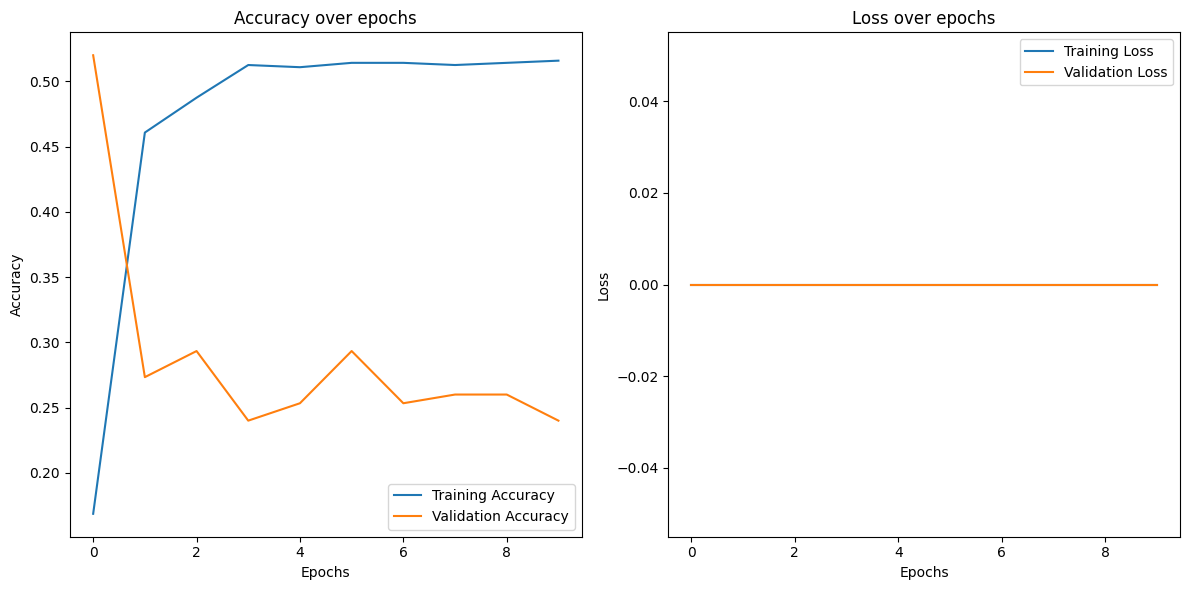

8/8 [==============================] - 1s 11ms/step


d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.58      0.57      0.57       122
     Class 1       0.02      0.50      0.04         6
     Class 2       0.00      0.00      0.00       122

    accuracy                           0.29       250
   macro avg       0.20      0.36      0.21       250
weighted avg       0.29      0.29      0.28       250



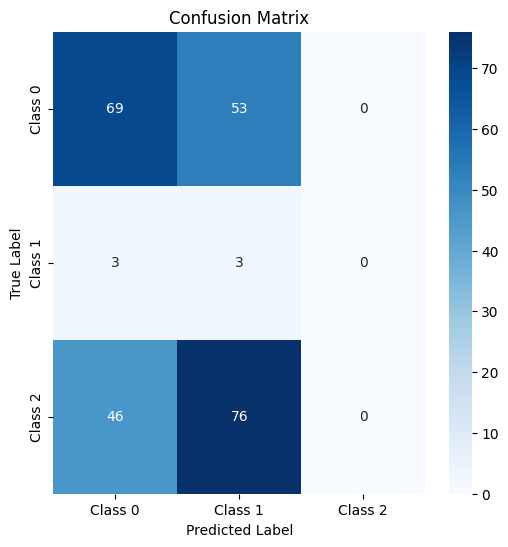

Training and evaluating GRU model...
Epoch 1/10
19/19 [==============================] - 14s 184ms/step - loss: 0.0000e+00 - accuracy: 0.4708 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 2/10
19/19 [==============================] - 2s 98ms/step - loss: 0.0000e+00 - accuracy: 0.4992 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 3/10
19/19 [==============================] - 2s 101ms/step - loss: 0.0000e+00 - accuracy: 0.4975 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 4/10
19/19 [==============================] - 2s 96ms/step - loss: 0.0000e+00 - accuracy: 0.4992 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 5/10
19/19 [==============================] - 2s 102ms/step - loss: 0.0000e+00 - accuracy: 0.4992 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 6/10
19/19 [==============================] - 2s 99ms/step - loss: 0.0000e+00 - accuracy: 0.4992 - val_loss: 0.0000e+00 - val_accuracy: 0.5133
Epoch 7/10
19/19 [==============================] - 2s 117ms/step

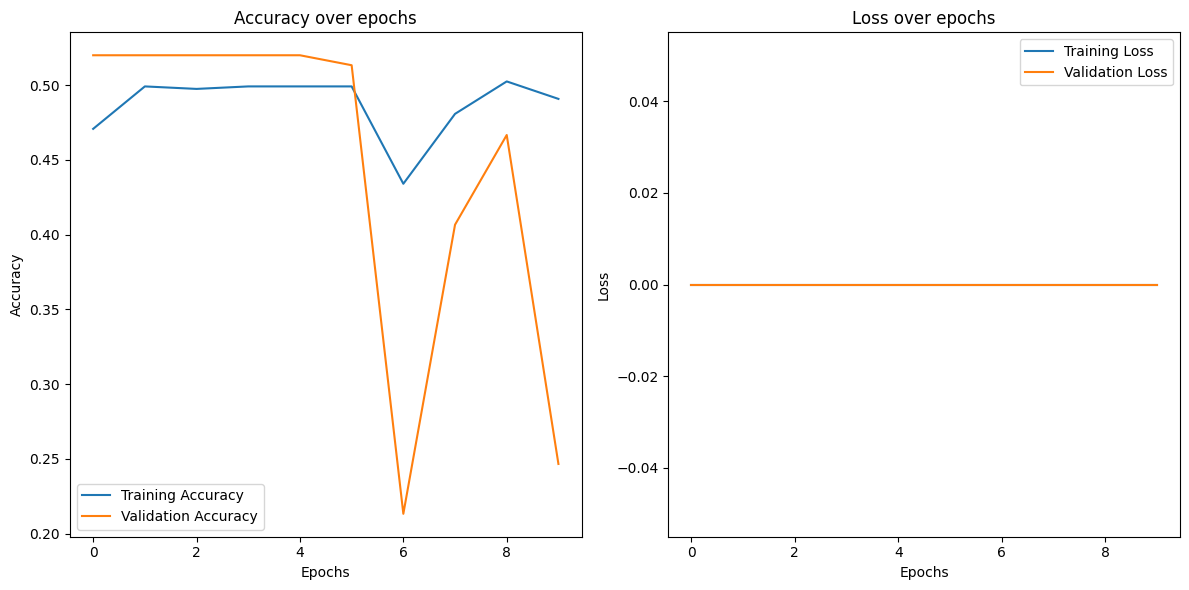

8/8 [==============================] - 3s 56ms/step
              precision    recall  f1-score   support

     Class 0       0.65      0.51      0.57       122
     Class 1       0.03      0.67      0.05         6
     Class 2       0.00      0.00      0.00       122

    accuracy                           0.26       250
   macro avg       0.23      0.39      0.21       250
weighted avg       0.32      0.26      0.28       250



d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


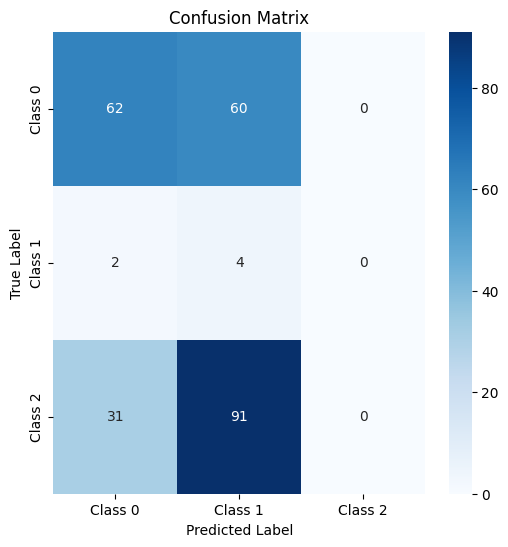

Training and evaluating LSTM model...
Epoch 1/10
19/19 [==============================] - 18s 215ms/step - loss: 0.0000e+00 - accuracy: 0.4791 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 2/10
19/19 [==============================] - 2s 102ms/step - loss: 0.0000e+00 - accuracy: 0.4975 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 3/10
19/19 [==============================] - 2s 96ms/step - loss: 0.0000e+00 - accuracy: 0.4808 - val_loss: 0.0000e+00 - val_accuracy: 0.3667
Epoch 4/10
19/19 [==============================] - 2s 99ms/step - loss: 0.0000e+00 - accuracy: 0.4775 - val_loss: 0.0000e+00 - val_accuracy: 0.3933
Epoch 5/10
19/19 [==============================] - 2s 99ms/step - loss: 0.0000e+00 - accuracy: 0.4958 - val_loss: 0.0000e+00 - val_accuracy: 0.3200
Epoch 6/10
19/19 [==============================] - 2s 102ms/step - loss: 0.0000e+00 - accuracy: 0.4942 - val_loss: 0.0000e+00 - val_accuracy: 0.3067
Epoch 7/10
19/19 [==============================] - 2s 100ms/ste

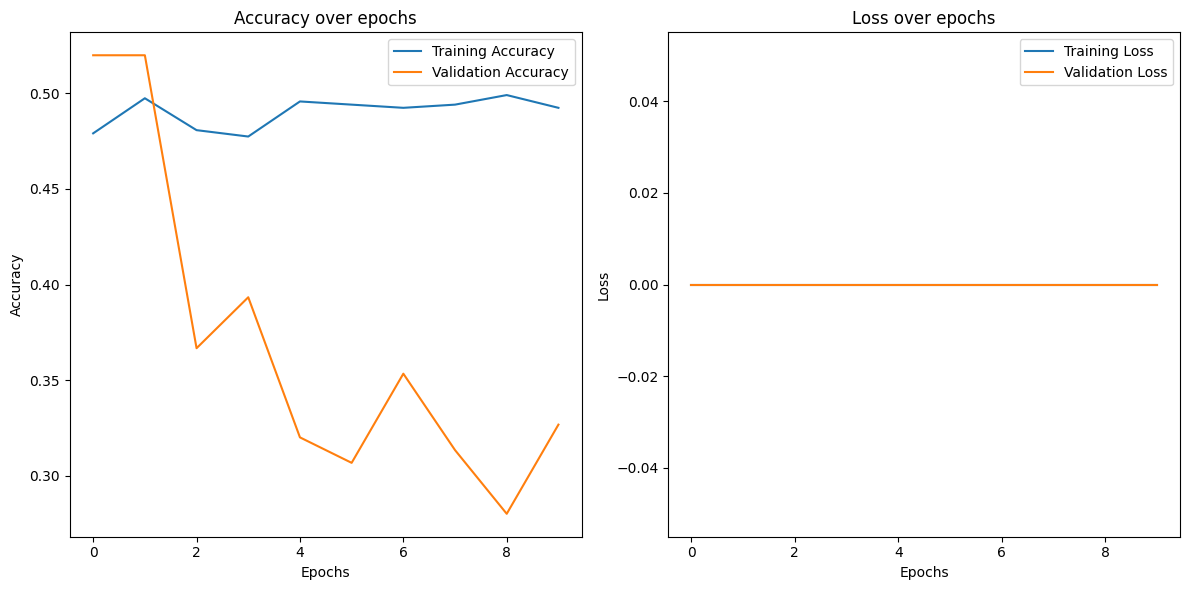

8/8 [==============================] - 2s 26ms/step
              precision    recall  f1-score   support

     Class 0       0.55      0.66      0.60       122
     Class 1       0.02      0.33      0.04         6
     Class 2       0.00      0.00      0.00       122

    accuracy                           0.33       250
   macro avg       0.19      0.33      0.21       250
weighted avg       0.27      0.33      0.30       250



d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


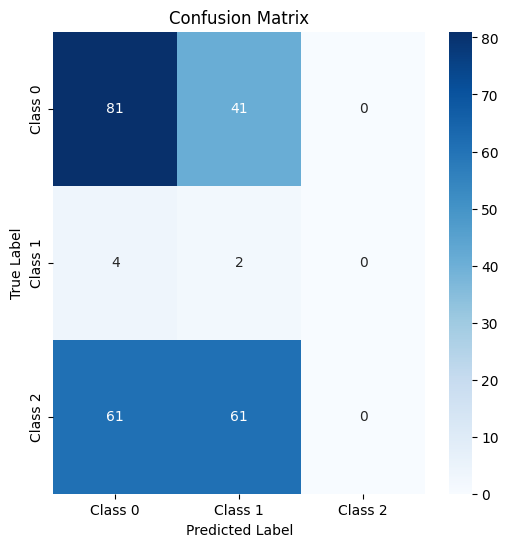

Training and evaluating BiLSTM model...
Epoch 1/10
19/19 [==============================] - 30s 502ms/step - loss: 0.0000e+00 - accuracy: 0.4674 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 2/10
19/19 [==============================] - 4s 241ms/step - loss: 0.0000e+00 - accuracy: 0.4992 - val_loss: 0.0000e+00 - val_accuracy: 0.5200
Epoch 3/10
19/19 [==============================] - 4s 201ms/step - loss: 0.0000e+00 - accuracy: 0.4875 - val_loss: 0.0000e+00 - val_accuracy: 0.4800
Epoch 4/10
19/19 [==============================] - 6s 301ms/step - loss: 0.0000e+00 - accuracy: 0.5025 - val_loss: 0.0000e+00 - val_accuracy: 0.3800
Epoch 5/10
19/19 [==============================] - 4s 187ms/step - loss: 0.0000e+00 - accuracy: 0.5025 - val_loss: 0.0000e+00 - val_accuracy: 0.3400
Epoch 6/10
19/19 [==============================] - 3s 169ms/step - loss: 0.0000e+00 - accuracy: 0.5075 - val_loss: 0.0000e+00 - val_accuracy: 0.2933
Epoch 7/10
19/19 [==============================] - 3s 160m

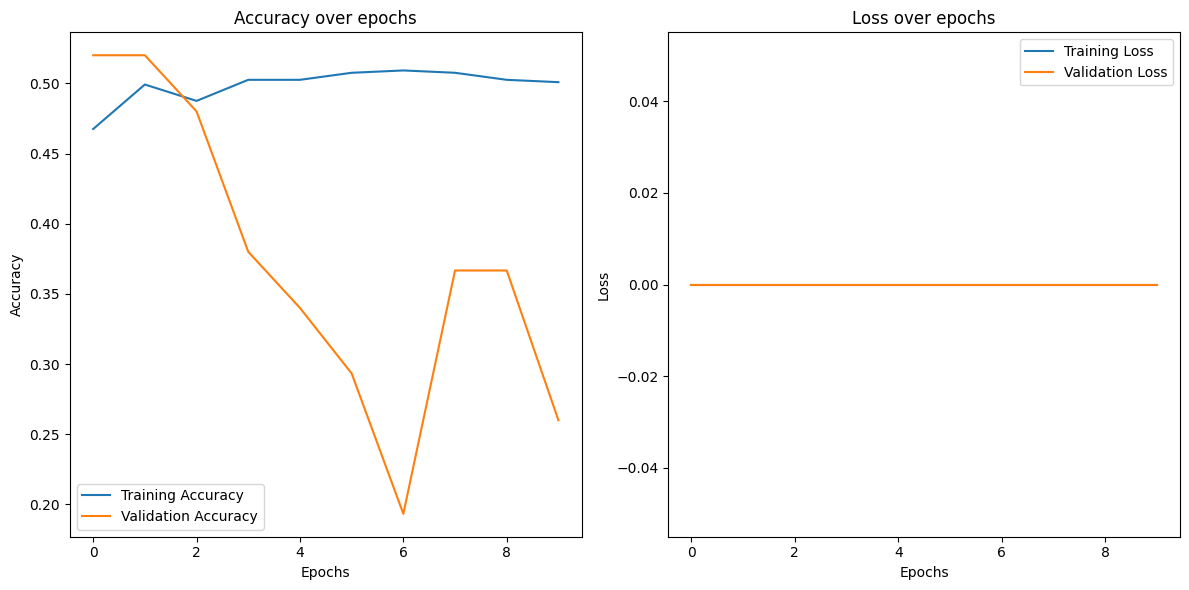

8/8 [==============================] - 5s 57ms/step
              precision    recall  f1-score   support

     Class 0       0.61      0.50      0.55       122
     Class 1       0.02      0.50      0.04         6
     Class 2       0.00      0.00      0.00       122

    accuracy                           0.26       250
   macro avg       0.21      0.33      0.20       250
weighted avg       0.30      0.26      0.27       250



d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python64\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


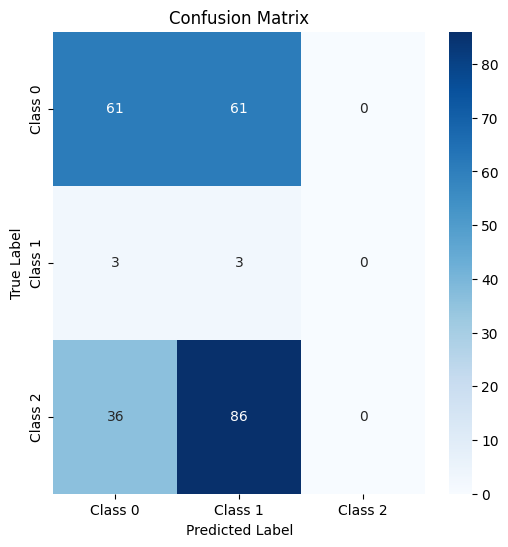

In [36]:

for model_type in models:
    print(f"Training and evaluating {model_type} model...")
    model = build_model(model_type)
    history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
    plot_history(history)  # Assuming plot_history is defined
    evaluate_model(model, X_test, y_test)  # Assuming evaluate_model is defined
